# Welcome 👋 AmadeusGPT🎻 Demo
- this notebook shows you how to get started with a simple AmadeusGPT example.

## Import common libraries

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import ipywidgets as widgets
from IPython.display import display


## Set up the API key here. 

In [2]:
if 'OPENAI_API_KEY' not in os.environ:
    os.environ['OPENAI_API_KEY'] = 'ENTER_YOUR_API_KEY_HERE'
import openai


In [3]:
import amadeusgpt
from amadeusgpt import AMADEUS, AnimalBehaviorAnalysis

<Figure size 450x450 with 0 Axes>

### Select a ChatGPT backend

In [30]:
amadeusgpt.brains.base.BaseBrain.gpt_model = 'gpt-4-1106-preview'

dropdown = widgets.Dropdown(
    options=['gpt-4-1106-preview', 'gpt-3.5-turbo-1106'],
    description='Select Model:',
    value="gpt-4-1106-preview",
    disabled=False,
)
def dropdown_eventhandler(change):   
    print(f'The GPT model you selected is {change.new}')
    amadeusgpt.brains.base.BaseBrain.gpt_model = change.new

dropdown.observe(dropdown_eventhandler, names='value')

# Display the dropdown
display(dropdown)

print(f'The GPT model you will use is {amadeusgpt.brains.base.BaseBrain.gpt_model}')

Dropdown(description='Select Model:', options=('gpt-4-1106-preview', 'gpt-3.5-turbo-1106'), value='gpt-4-1106-…

The GPT model you will use is gpt-4-1106-preview


## We use demo data from the AmadeusGPT github repo, but you can use your own
- To use your own, change the paths!
- To use our data, git clone the repo, and head to the examples folder. Tip: you can use `%ls` to see where you are, and use `%cd` to change directories

In [5]:
cur_dir = os.getcwd()

video_file_path = os.path.join(cur_dir,'EPM/EPM_11DLC_snapshot-1000_labeled_x264.mp4')
keypoint_file_path = os.path.join(cur_dir,'EPM/EPM_11DLC_snapshot-1000.h5')



### Set up AmadeusGPT with the data:

In [6]:
AnimalBehaviorAnalysis.set_video_file_path(video_file_path)
AnimalBehaviorAnalysis.set_keypoint_file_path(keypoint_file_path)

2023-12-21 19:27:35.709 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`


### Define outputs:

In [7]:
def render(amadeus_answer):
    render_keys = ['error_function_code', 'error_message', 'chain_of_thoughts', 'plots', 'str_answer', 'ndarray', 'summary']
    for render_key in render_keys:
        render_value = getattr(amadeus_answer,render_key)
        if render_value is None:
            continue
        if render_key != 'plots':
            if isinstance(render_value, list):
                for e in render_value:
                    print (e)
            else:
                print (render_value)
    plt.show()
    

## Let's chat with AmadeusGPT🎻

INFO:root:20231221_192736 - session_id: - username:no_username - email: no_email - /Users/shaokaiye/release/AmadeusGPT/amadeusgpt/modules/api/visualization/occupancy_plot.py has low similarity score of 0.6898738410869267
INFO:root:20231221_192736 - session_id: - username:no_username - email: no_email - /Users/shaokaiye/release/AmadeusGPT/amadeusgpt/modules/api/embedding/umap.py has low similarity score of 0.6873444955002979
INFO:root:20231221_192736 - session_id: - username:no_username - email: no_email - /Users/shaokaiye/release/AmadeusGPT/amadeusgpt/modules/api/visualization/gait_plot.py has low similarity score of 0.6698177019757722
INFO:root:20231221_192736 - session_id: - username:no_username - email: no_email - the gpt model that is being used gpt-4-1106-preview
INFO:root:20231221_192806 - session_id: - username:no_username - email: no_email - Full response from openAI before only matching function string:
INFO:root:20231221_192806 - session_id: - username:no_username - email: no

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "To plot the speed of the mouse over time, we will use the `get_speed()` method from the `AnimalBehaviorAnalysis` class to obtain the speed data. Then, we will average the speed across all keypoints (body parts) for each frame to get a single speed value per frame for the mouse. Finally, we will plot this averaged speed over time.\n\nHere's the function definition for `task_program` that accomplishes this:\n\n```python\ndef task_program():\n    # Create an instance of AnimalBehaviorAnalysis\n    behavior_analysis = AnimalBehaviorAnalysis()\n    \n    # Get the speed data\n    speed = behavior_analysis.get_speed()\n    \n    # Average the speed across all keypoints (body parts)\n    # speed shape is (n_frames, n_individuals, n_kpts, 1)\n    averaged_speed = np.nanmean(speed, axis=2)  # Averaging across keypoints\n    \n    # Extract the speed for the firs

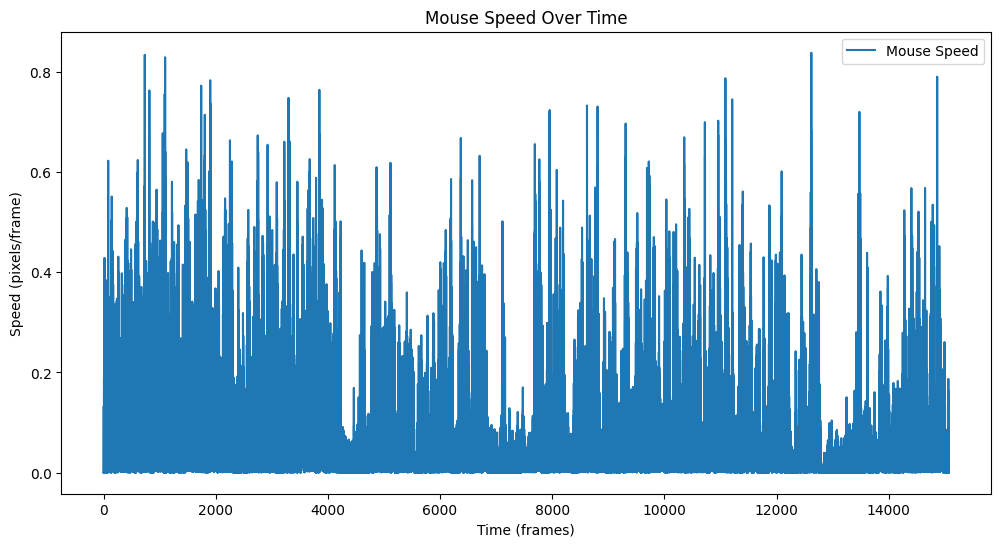

In [8]:
query = 'plot the speed of the mouse over time'

answer = AMADEUS.chat_iteration(query)
render(answer)


INFO:root:20231221_192807 - session_id: - username:no_username - email: no_email - /Users/shaokaiye/release/AmadeusGPT/amadeusgpt/modules/api/visualization/occupancy_plot.py has low similarity score of 0.696484710566247
INFO:root:20231221_192807 - session_id: - username:no_username - email: no_email - /Users/shaokaiye/release/AmadeusGPT/amadeusgpt/modules/api/embedding/umap.py has low similarity score of 0.6948499880560898
INFO:root:20231221_192807 - session_id: - username:no_username - email: no_email - /Users/shaokaiye/release/AmadeusGPT/amadeusgpt/modules/api/dataset_io/monkey_reach_cebra.py has low similarity score of 0.6883895373546054
INFO:root:20231221_192807 - session_id: - username:no_username - email: no_email - the gpt model that is being used gpt-4-1106-preview
INFO:root:20231221_192812 - session_id: - username:no_username - email: no_email - Full response from openAI before only matching function string:
INFO:root:20231221_192812 - session_id: - username:no_username - emai

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "def task_program():\n    behavior_analysis = AnimalBehaviorAnalysis()\n    # Plot the trajectory of the mouse using all bodyparts to represent the center of the body\n    traj_plot_info = behavior_analysis.plot_trajectory([\"all\"])\n    return traj_plot_info\n\n# This function will return a tuple containing the matplotlib figure and axes objects, along with a caption describing the plot.",
        "role": "assistant"
      }
    }
  ],
  "created": 1703183288,
  "id": "chatcmpl-8YI48bPubfMcA6mZFLD9ooLAonyOT",
  "model": "gpt-4-1106-preview",
  "object": "chat.completion",
  "system_fingerprint": "fp_3905aa4f79",
  "usage": {
    "completion_tokens": 73,
    "prompt_tokens": 6465,
    "total_tokens": 6538
  }
}
def task_program():
    behavior_analysis = AnimalBehaviorAnalysis()
    # Plot the trajectory of the mouse using all bodyparts to represent the

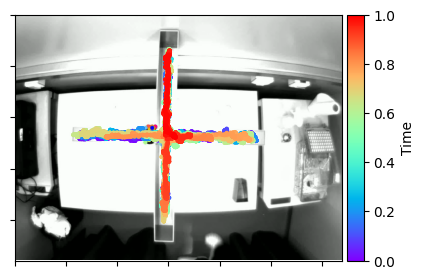

In [9]:
query = 'plot the trajectory of the mouse'

answer = AMADEUS.chat_iteration(query)
render(answer)